# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Set style seaborn
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Membaca dataset
df = pd.read_csv('dataset/CC_GENERAL.csv')

# Menampilkan 5 baris pertama
print("5 baris pertama dataset:")
display(df.head())

# Informasi dataset
print("\nInformasi dataset:")
display(df.info())

# Deskripsi statistik
print("\nDeskripsi statistik:")
display(df.describe())

# Mengecek jumlah baris dan kolom
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Mengecek apakah ada nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
display(df.isnull().sum())

5 baris pertama dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null  

None


Deskripsi statistik:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



Jumlah baris: 8950
Jumlah kolom: 18

Jumlah nilai yang hilang per kolom:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Tipe data setiap kolom:


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


Statistik dasar:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



Nilai unik untuk kolom kategorikal:
CUST_ID: 8950 nilai unik
CUST_ID
C19190    1
C10001    1
C10002    1
C10003    1
C10004    1
Name: count, dtype: int64



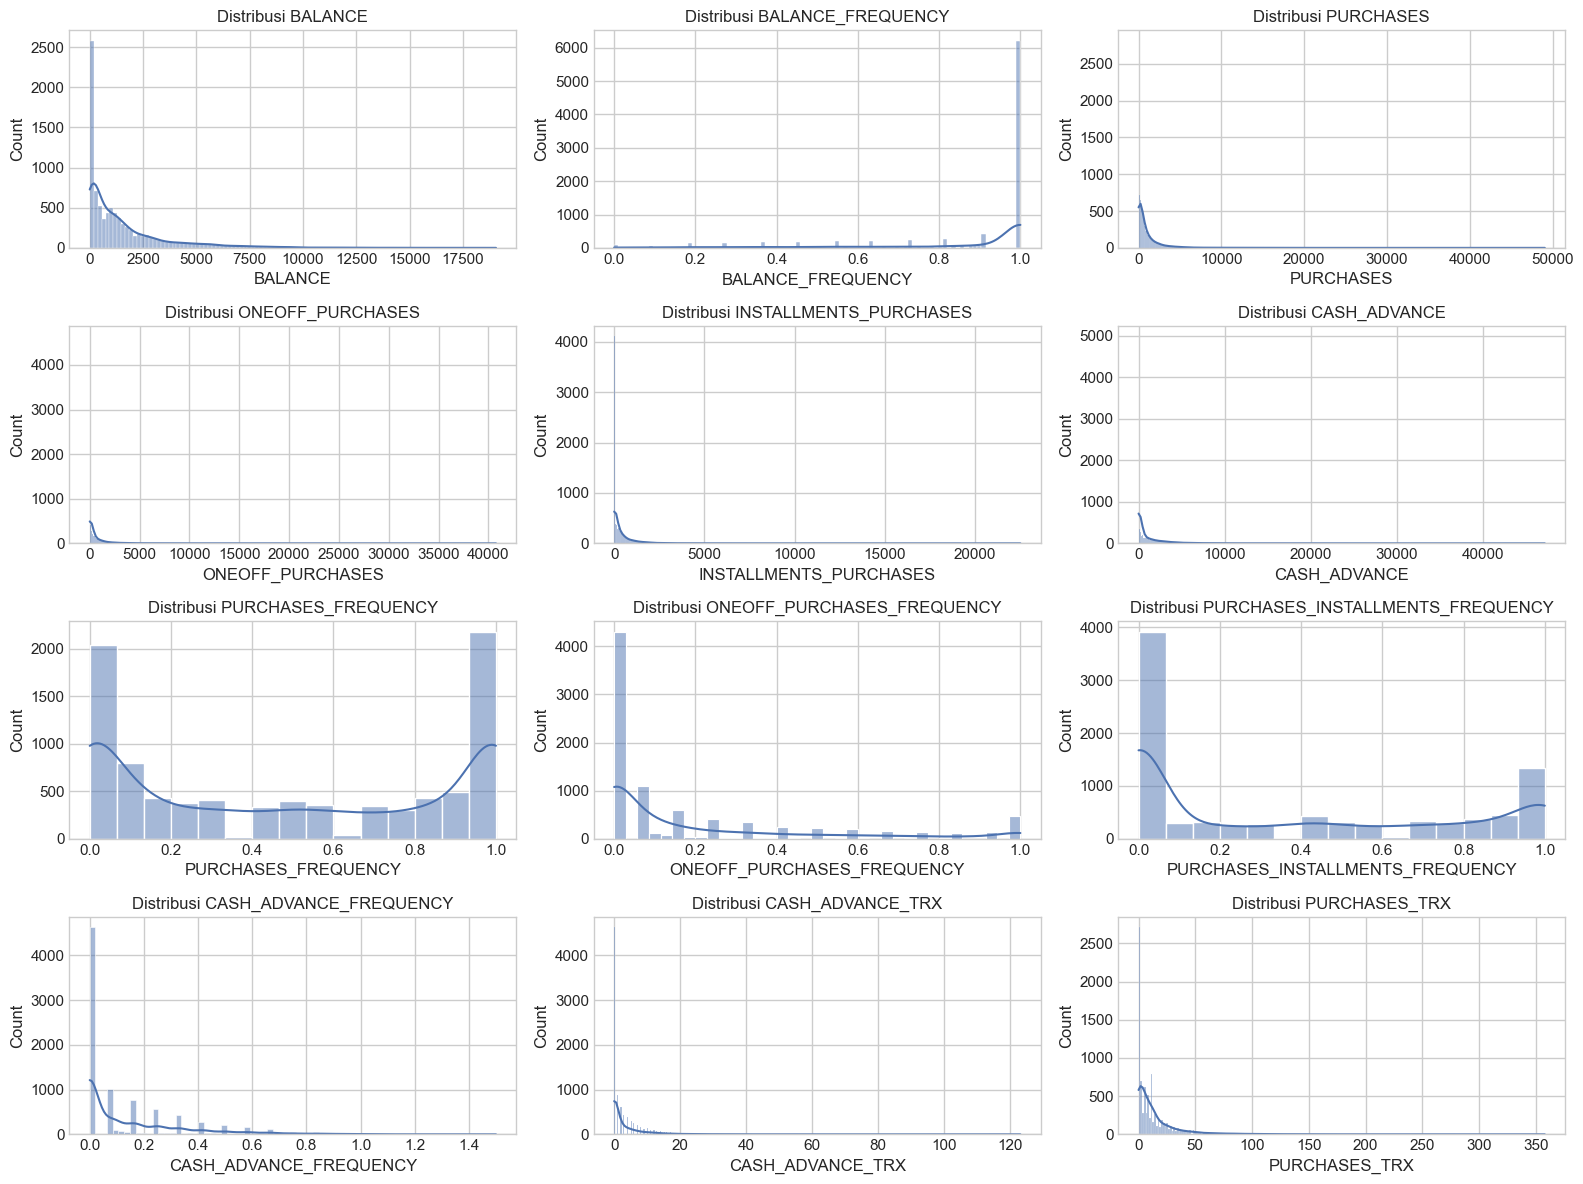

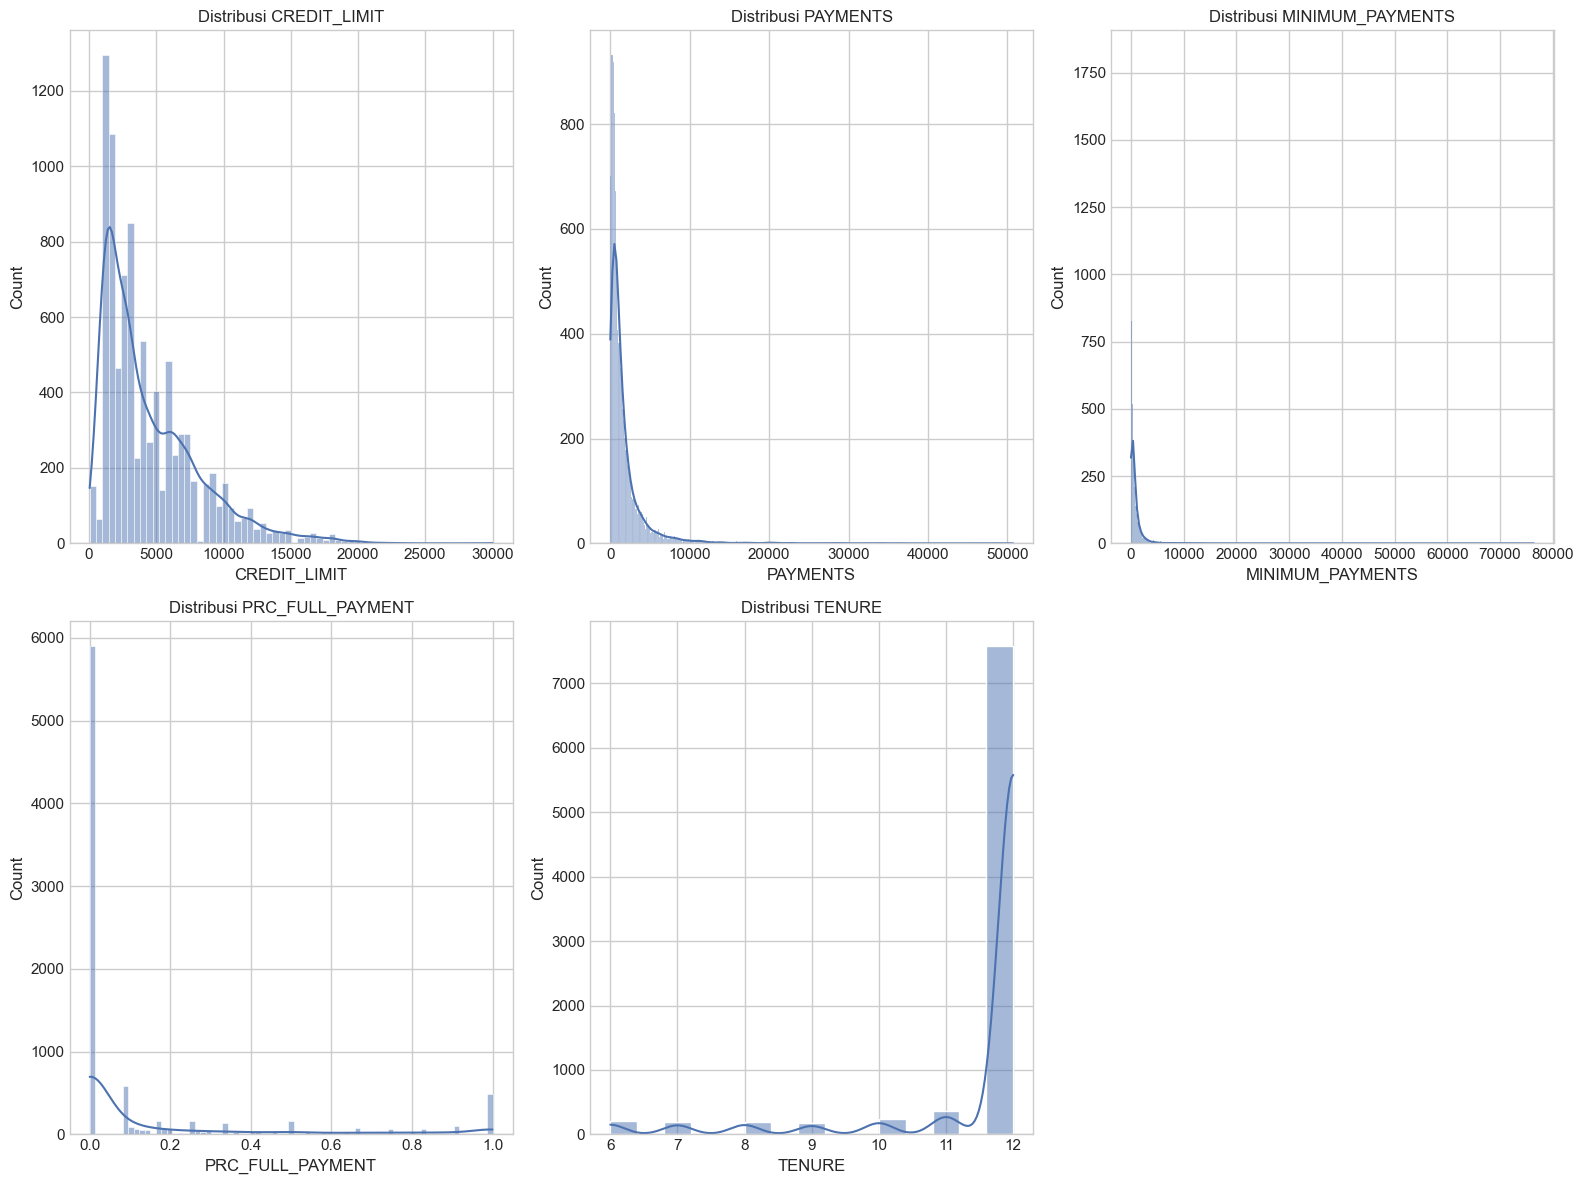

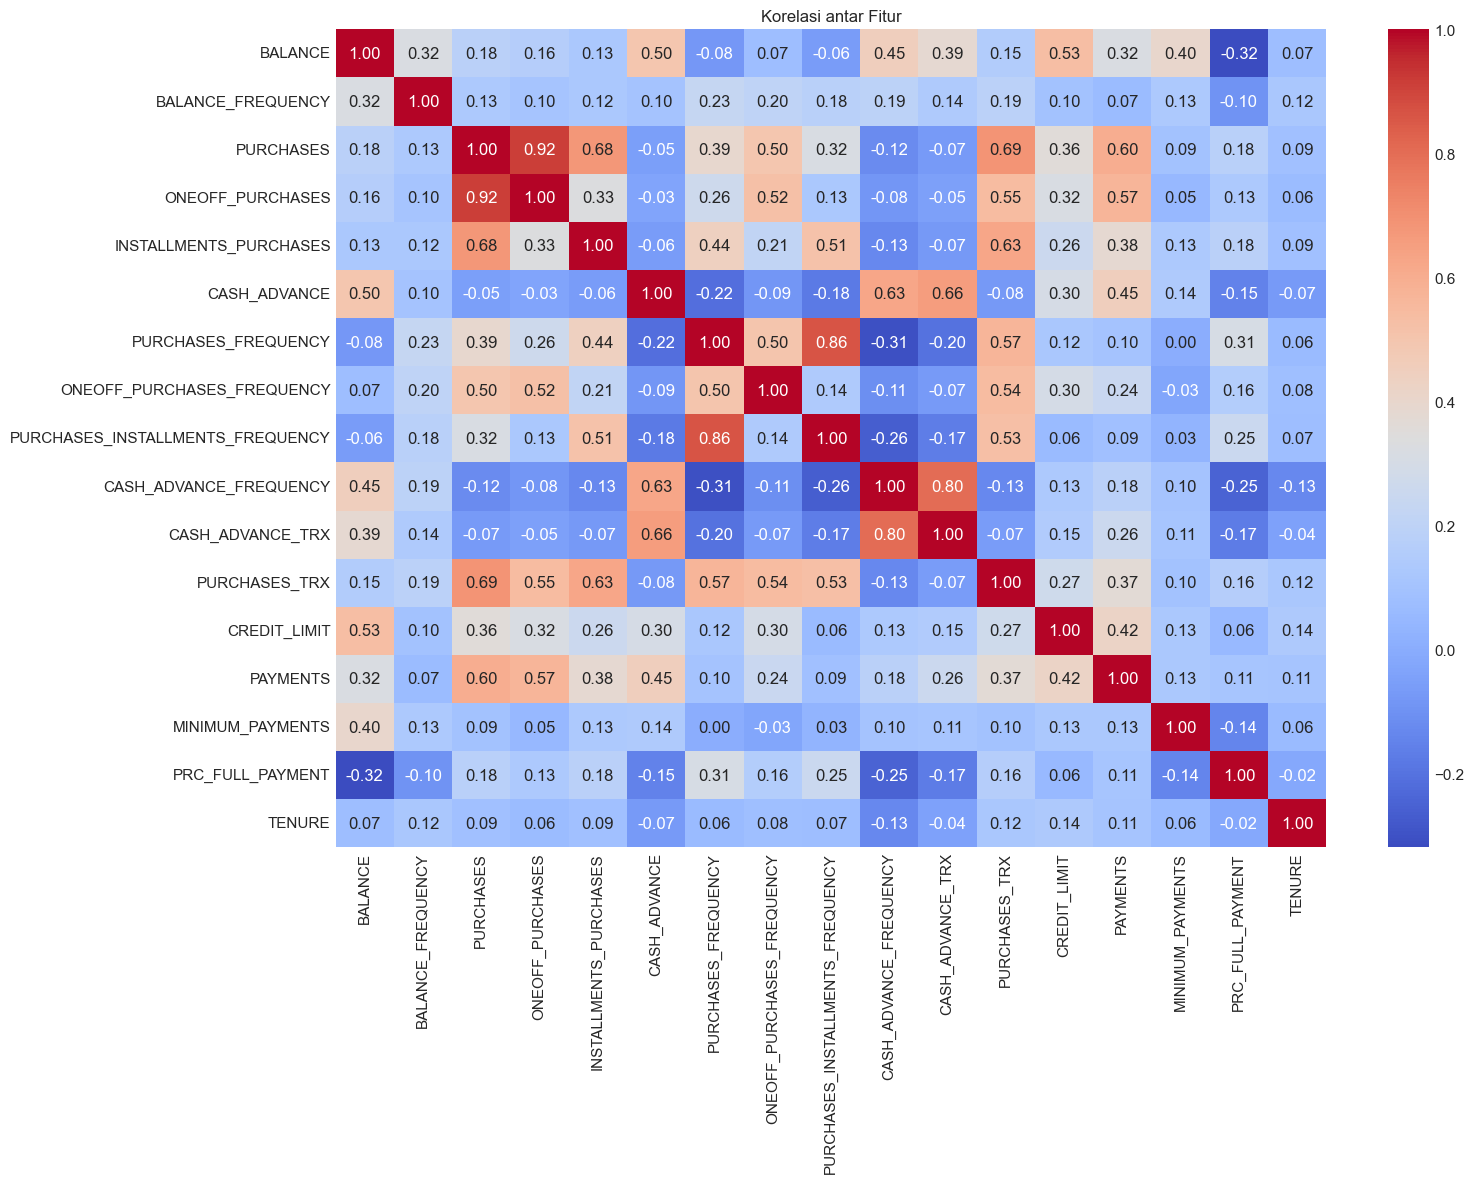

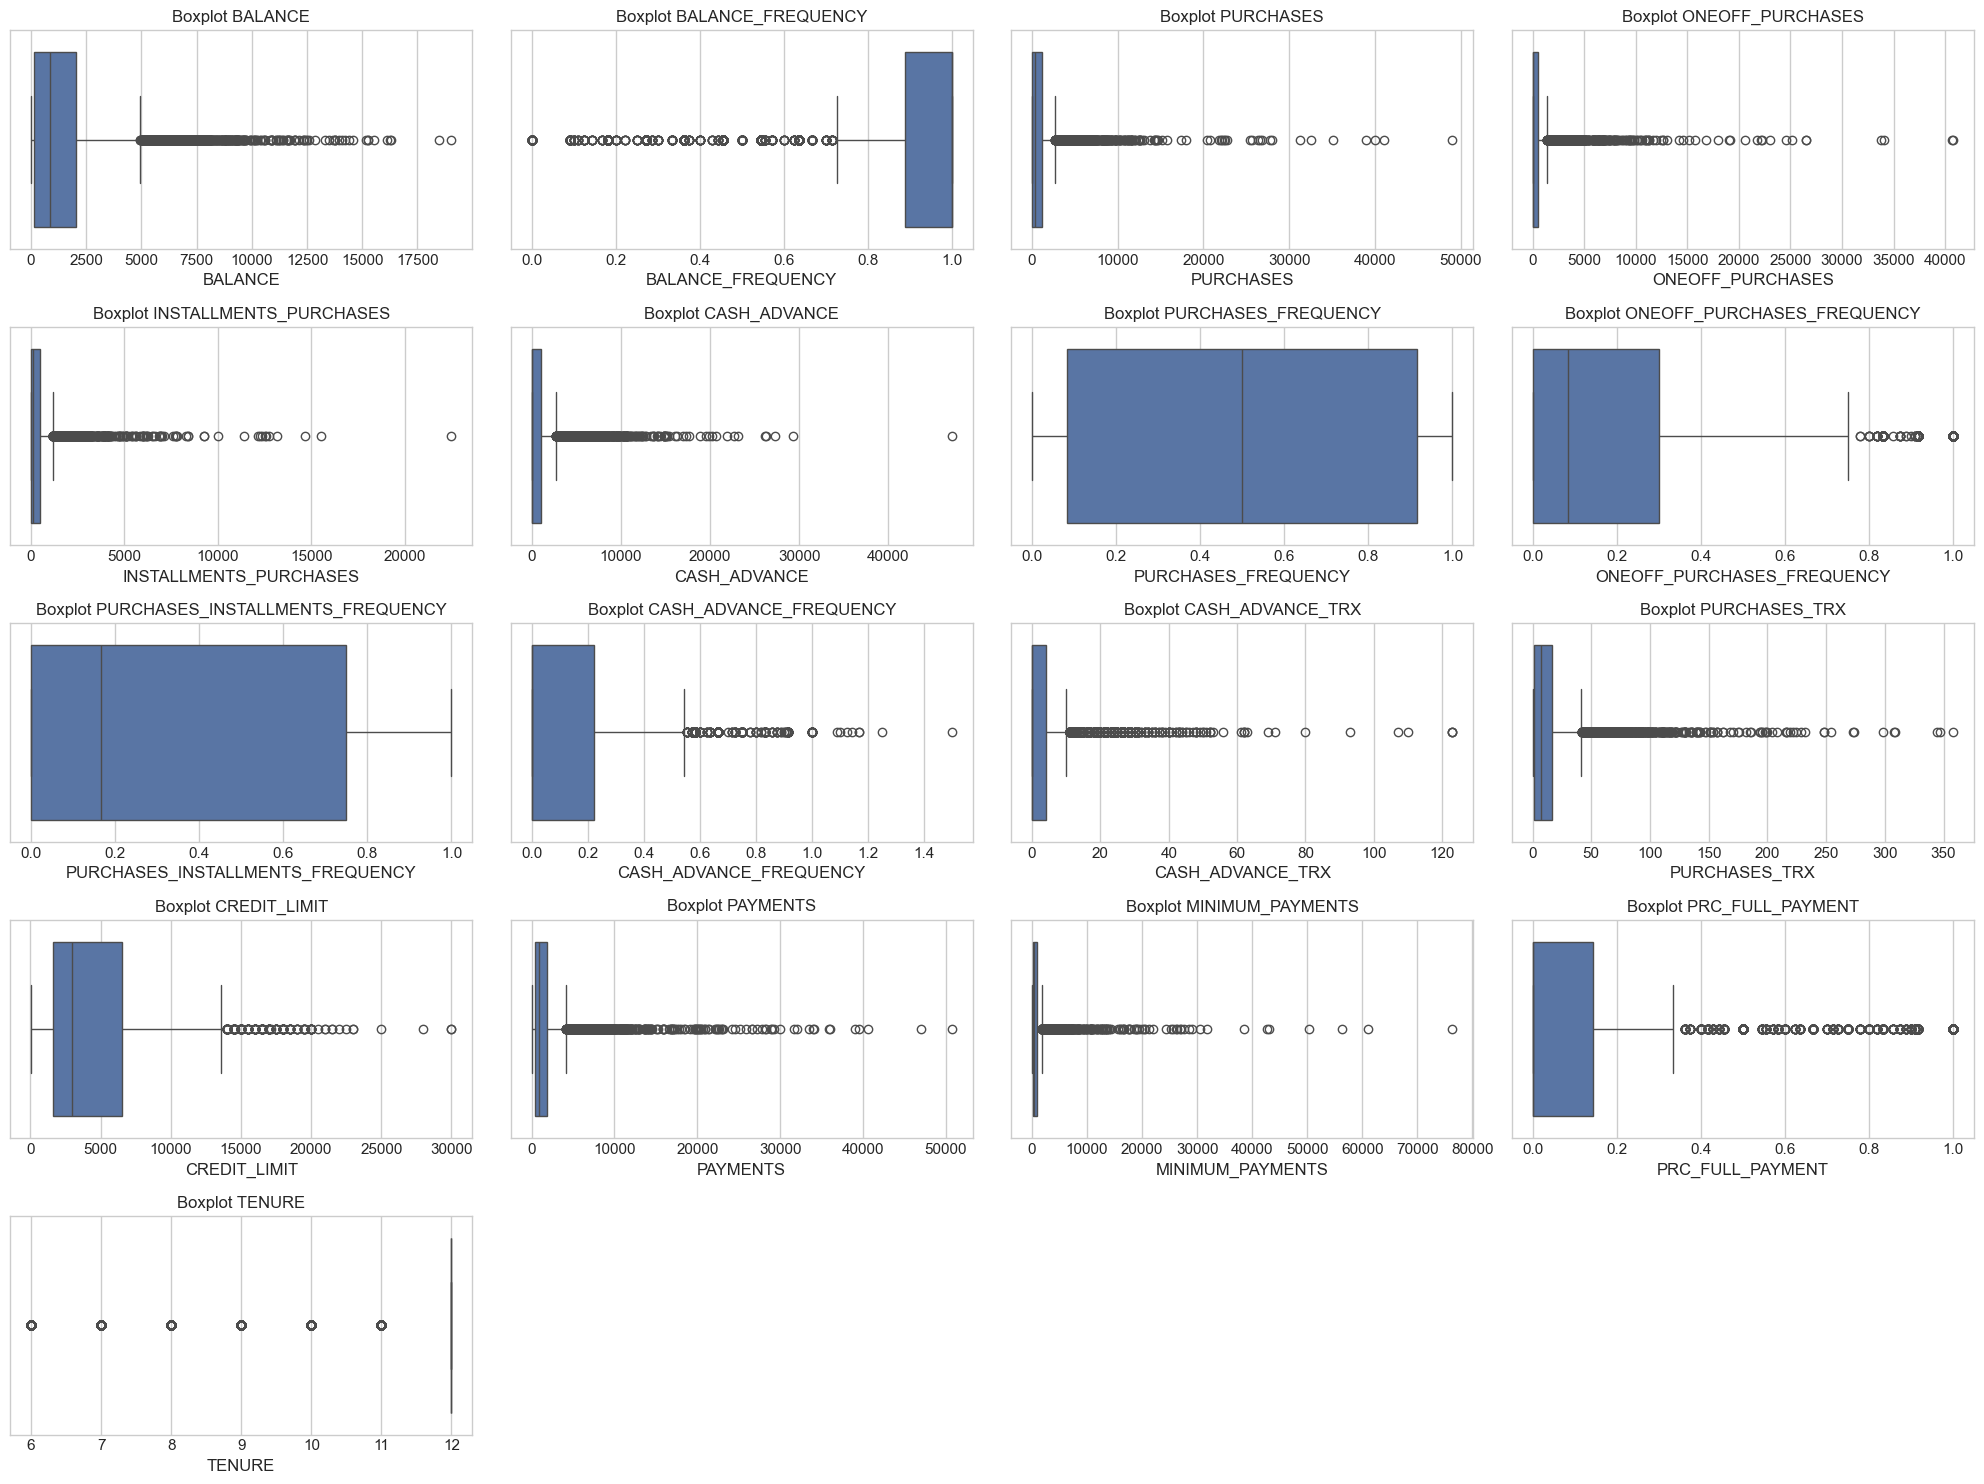

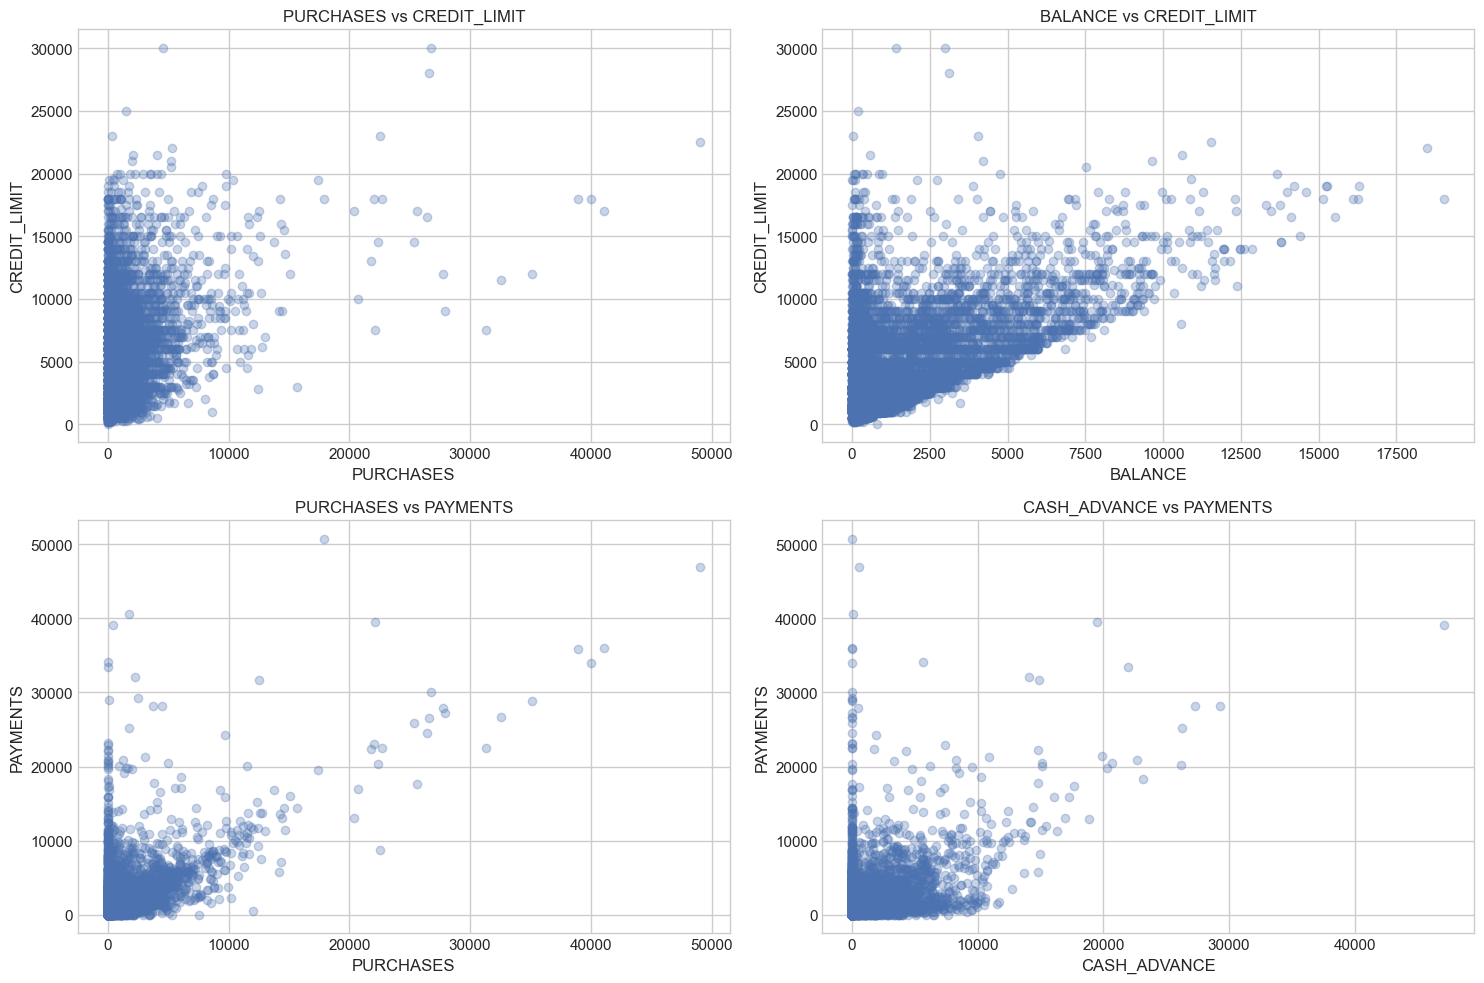

In [3]:
# Mengecek tipe data setiap kolom
print("Tipe data setiap kolom:")
display(df.dtypes)

# Menampilkan statistik dasar
print("\nStatistik dasar:")
display(df.describe())

# Mengecek nilai unik untuk kolom kategorikal (jika ada)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nNilai unik untuk kolom kategorikal:")
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} nilai unik")
        print(df[col].value_counts().head())
        print()

# Mengecek distribusi data
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns[1:13], 1):  # Skip CUST_ID
    plt.subplot(4, 3, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribusi {column}')
    plt.tight_layout()
plt.show()

# Mengecek distribusi data (lanjutan)
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns[13:], 1):  # Kolom sisanya
    if column != 'CUST_ID':  # Skip CUST_ID
        plt.subplot(2, 3, i)
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribusi {column}')
        plt.tight_layout()
plt.show()

# Melihat korelasi antar fitur
plt.figure(figsize=(16, 12))
correlation_matrix = df.drop('CUST_ID', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur')
plt.tight_layout()
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[1:], 1):  # Skip CUST_ID
    if i <= 18:  # Limit to 18 subplots
        plt.subplot(5, 4, i)
        sns.boxplot(x=df[column].dropna())
        plt.title(f'Boxplot {column}')
        plt.tight_layout()
plt.show()

# Scatter plot untuk beberapa fitur penting
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['PURCHASES'], df['CREDIT_LIMIT'], alpha=0.3)
plt.title('PURCHASES vs CREDIT_LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

plt.subplot(2, 2, 2)
plt.scatter(df['BALANCE'], df['CREDIT_LIMIT'], alpha=0.3)
plt.title('BALANCE vs CREDIT_LIMIT')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

plt.subplot(2, 2, 3)
plt.scatter(df['PURCHASES'], df['PAYMENTS'], alpha=0.3)
plt.title('PURCHASES vs PAYMENTS')
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')

plt.subplot(2, 2, 4)
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], alpha=0.3)
plt.title('CASH_ADVANCE vs PAYMENTS')
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [4]:
# Membuat salinan dataframe
df_preprocessed = df.copy()

# Menghapus kolom CUST_ID karena tidak relevan untuk clustering
df_preprocessed = df_preprocessed.drop('CUST_ID', axis=1)

# Menangani nilai yang hilang
print("Jumlah nilai yang hilang per kolom sebelum diproses:")
print(df_preprocessed.isnull().sum())

# Mengganti nilai yang hilang dengan median untuk kolom numerik
for column in df_preprocessed.columns:
    if df_preprocessed[column].isnull().sum() > 0:
        df_preprocessed[column].fillna(df_preprocessed[column].median(), inplace=True)

print("\nJumlah nilai yang hilang per kolom setelah diproses:")
print(df_preprocessed.isnull().sum())

# Menyimpan dataframe asli sebelum scaling untuk digunakan nanti
df_original = df_preprocessed.copy()

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_preprocessed), columns=df_preprocessed.columns)

print("\nData setelah scaling:")
display(df_scaled.head())

# Cek apakah ada outlier menggunakan IQR
def detect_outliers(df):
    outliers_indices = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers_indices[col] = list(outliers)
        
        print(f"{col}: {len(outliers)} outliers detected")
    
    return outliers_indices

print("\nDeteksi outlier:")
outliers = detect_outliers(df_preprocessed)

Jumlah nilai yang hilang per kolom sebelum diproses:
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Jumlah nilai yang hilang per kolom setelah diproses:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVAN

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068



Deteksi outlier:
BALANCE: 695 outliers detected
BALANCE_FREQUENCY: 1493 outliers detected
PURCHASES: 808 outliers detected
ONEOFF_PURCHASES: 1013 outliers detected
INSTALLMENTS_PURCHASES: 867 outliers detected
CASH_ADVANCE: 1030 outliers detected
PURCHASES_FREQUENCY: 0 outliers detected
ONEOFF_PURCHASES_FREQUENCY: 782 outliers detected
PURCHASES_INSTALLMENTS_FREQUENCY: 0 outliers detected
CASH_ADVANCE_FREQUENCY: 525 outliers detected
CASH_ADVANCE_TRX: 804 outliers detected
PURCHASES_TRX: 766 outliers detected
CREDIT_LIMIT: 248 outliers detected
PAYMENTS: 808 outliers detected
MINIMUM_PAYMENTS: 909 outliers detected
PRC_FULL_PAYMENT: 1474 outliers detected
TENURE: 1366 outliers detected


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [5]:
# Membangun model KMeans
k_values = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(df_scaled)
    inertias.append(model.inertia_)
    
    # Hitung silhouette score
    if k > 1:  # Silhouette score membutuhkan minimal 2 clusters
        silhouette_avg = silhouette_score(df_scaled, model.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"K = {k}, Silhouette Score: {silhouette_avg:.4f}")
    else:
        silhouette_scores.append(0)

K = 2, Silhouette Score: 0.2100
K = 3, Silhouette Score: 0.2510
K = 4, Silhouette Score: 0.1977
K = 5, Silhouette Score: 0.1931
K = 6, Silhouette Score: 0.2029
K = 7, Silhouette Score: 0.2077
K = 8, Silhouette Score: 0.2217
K = 9, Silhouette Score: 0.2260
K = 10, Silhouette Score: 0.2204


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

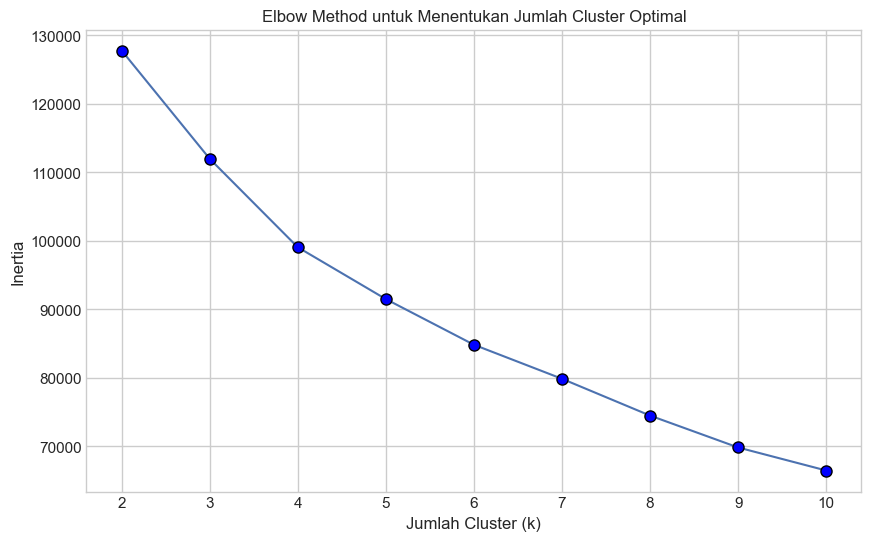

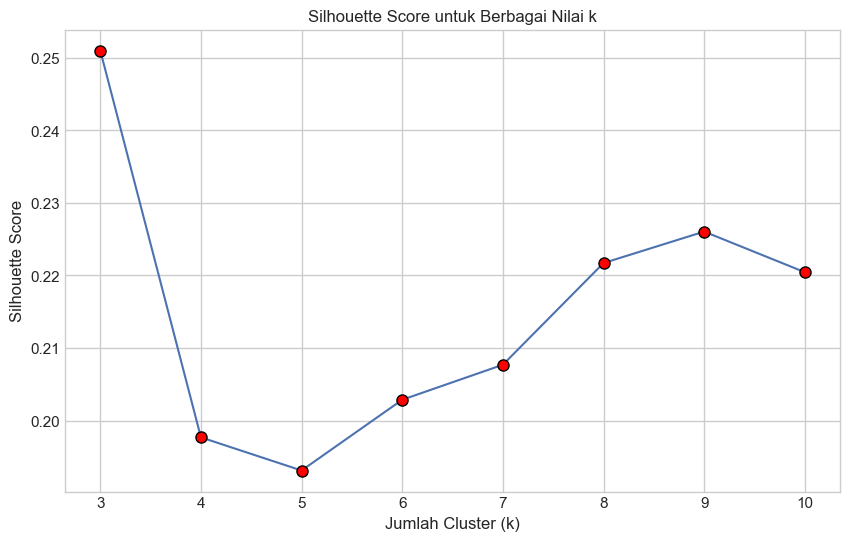

Jumlah cluster optimal berdasarkan Silhouette Score: 3


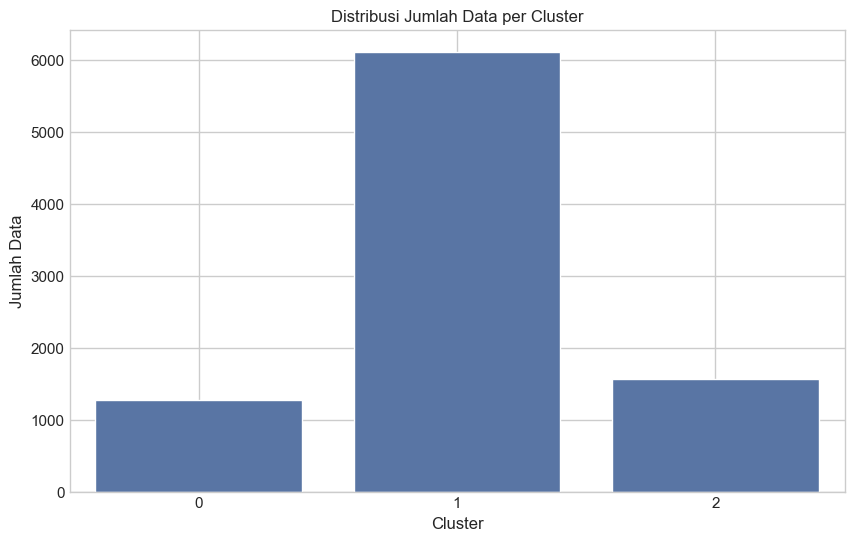

In [6]:
# Plot elbow method untuk menentukan jumlah cluster yang optimal
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'o-', markersize=8, markerfacecolor='blue', markeredgecolor='black')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()

# Plot silhouette scores untuk berbagai nilai k
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores[1:], 'o-', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Nilai k')
plt.grid(True)
plt.show()

# Menentukan jumlah cluster optimal berdasarkan silhouette score
optimal_k = k_values[1:][np.argmax(silhouette_scores[1:])]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

# Membangun model final dengan jumlah cluster optimal
final_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_model.fit(df_scaled)

# Menambahkan label cluster ke dataframe
df_scaled['Cluster'] = final_model.labels_
df_original['Cluster'] = final_model.labels_

# Menampilkan distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_scaled)
plt.title('Distribusi Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Fitur terpilih: ['CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

Dataframe dengan fitur terpilih:


,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX
0,-0.466786,-0.678661,-0.675349,-0.476070,-0.511333
1,2.605605,-0.678661,0.573963,0.110074,-0.591796
2,-0.466786,2.673451,-0.675349,-0.476070,-0.109020
3,-0.368653,-0.399319,-0.258913,-0.329534,-0.551565
4,-0.466786,-0.399319,-0.675349,-0.476070,-0.551565


K = 2, Silhouette Score (fitur terpilih): 0.4943
K = 3, Silhouette Score (fitur terpilih): 0.4969
K = 4, Silhouette Score (fitur terpilih): 0.4642
K = 5, Silhouette Score (fitur terpilih): 0.4658
K = 6, Silhouette Score (fitur terpilih): 0.4303
K = 7, Silhouette Score (fitur terpilih): 0.4266
K = 8, Silhouette Score (fitur terpilih): 0.3877
K = 9, Silhouette Score (fitur terpilih): 0.3906
K = 10, Silhouette Score (fitur terpilih): 0.3779


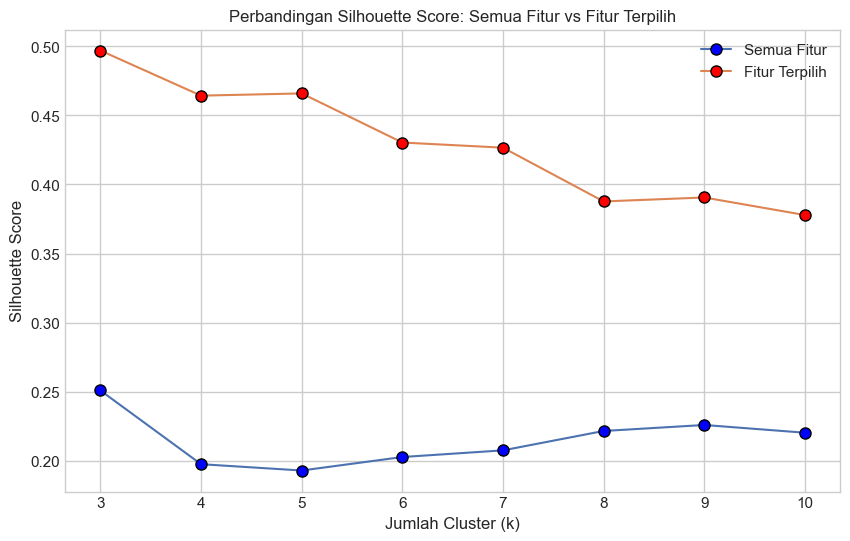

Jumlah cluster optimal baru (dengan fitur terpilih): 3


In [7]:
# Kita perlu target variable, kita akan gunakan cluster labels sebagai target
X = df_scaled.drop('Cluster', axis=1)
y = df_scaled['Cluster']

# Memilih k fitur terbaik
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Mendapatkan nama fitur terpilih
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print("Fitur terpilih:", selected_features.tolist())

# Membuat dataframe baru dengan fitur terpilih
X_selected = X[selected_features]
print("\nDataframe dengan fitur terpilih:")
display(X_selected.head())

# Melakukan clustering dengan fitur terpilih
inertias_selected = []
silhouette_scores_selected = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_selected)
    inertias_selected.append(model.inertia_)
    
    # Hitung silhouette score
    if k > 1:
        silhouette_avg = silhouette_score(X_selected, model.labels_)
        silhouette_scores_selected.append(silhouette_avg)
        print(f"K = {k}, Silhouette Score (fitur terpilih): {silhouette_avg:.4f}")
    else:
        silhouette_scores_selected.append(0)

# Plot silhouette scores untuk berbagai nilai k (fitur terpilih)
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores[1:], 'o-', label='Semua Fitur', markersize=8, markerfacecolor='blue', markeredgecolor='black')
plt.plot(k_values[1:], silhouette_scores_selected[1:], 'o-', label='Fitur Terpilih', markersize=8, markerfacecolor='red', markeredgecolor='black')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score: Semua Fitur vs Fitur Terpilih')
plt.legend()
plt.grid(True)
plt.show()

# Menentukan jumlah cluster optimal baru
optimal_k_selected = k_values[1:][np.argmax(silhouette_scores_selected[1:])]
print(f"Jumlah cluster optimal baru (dengan fitur terpilih): {optimal_k_selected}")

# Membangun model final dengan fitur terpilih
final_model_selected = KMeans(n_clusters=optimal_k_selected, random_state=42, n_init=10)
final_model_selected.fit(X_selected)

# Menambahkan label cluster baru ke dataframe
X_selected['Cluster'] = final_model_selected.labels_

# Menggabungkan label cluster baru ke dataframe asli
df_original['Cluster_Selected'] = final_model_selected.labels_

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

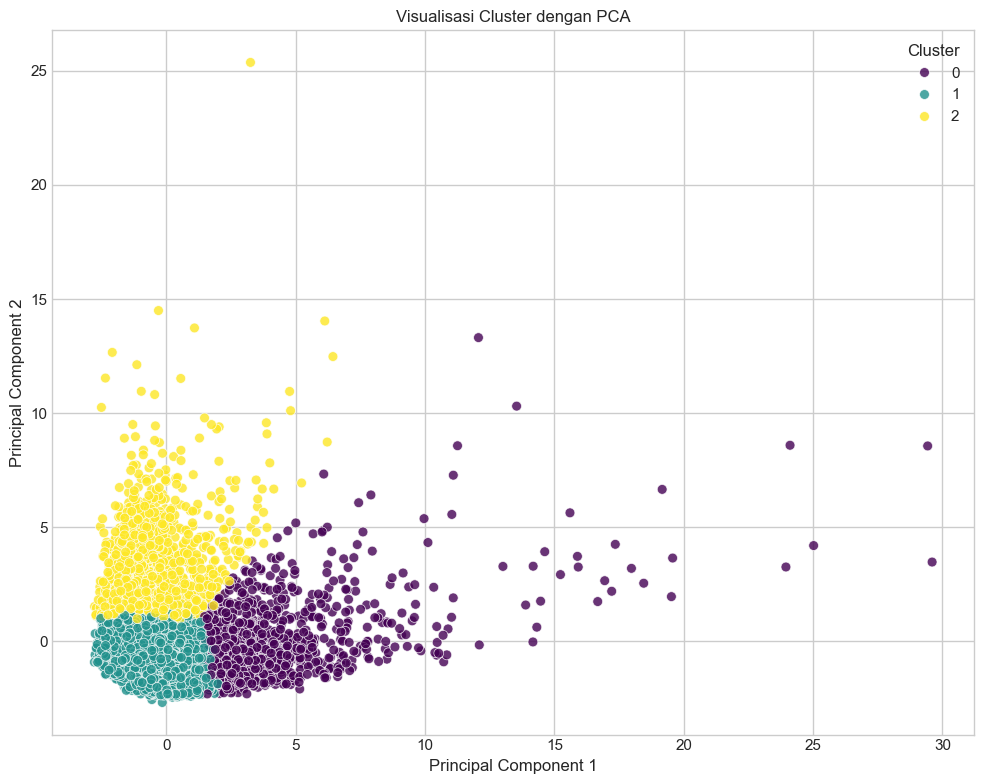

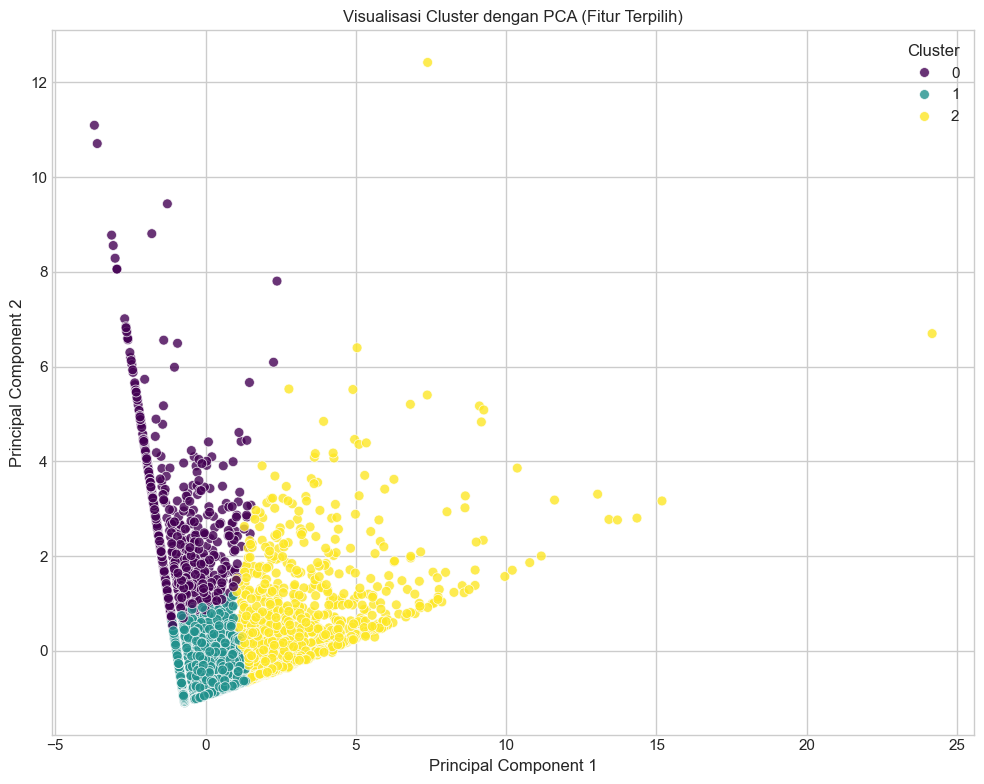

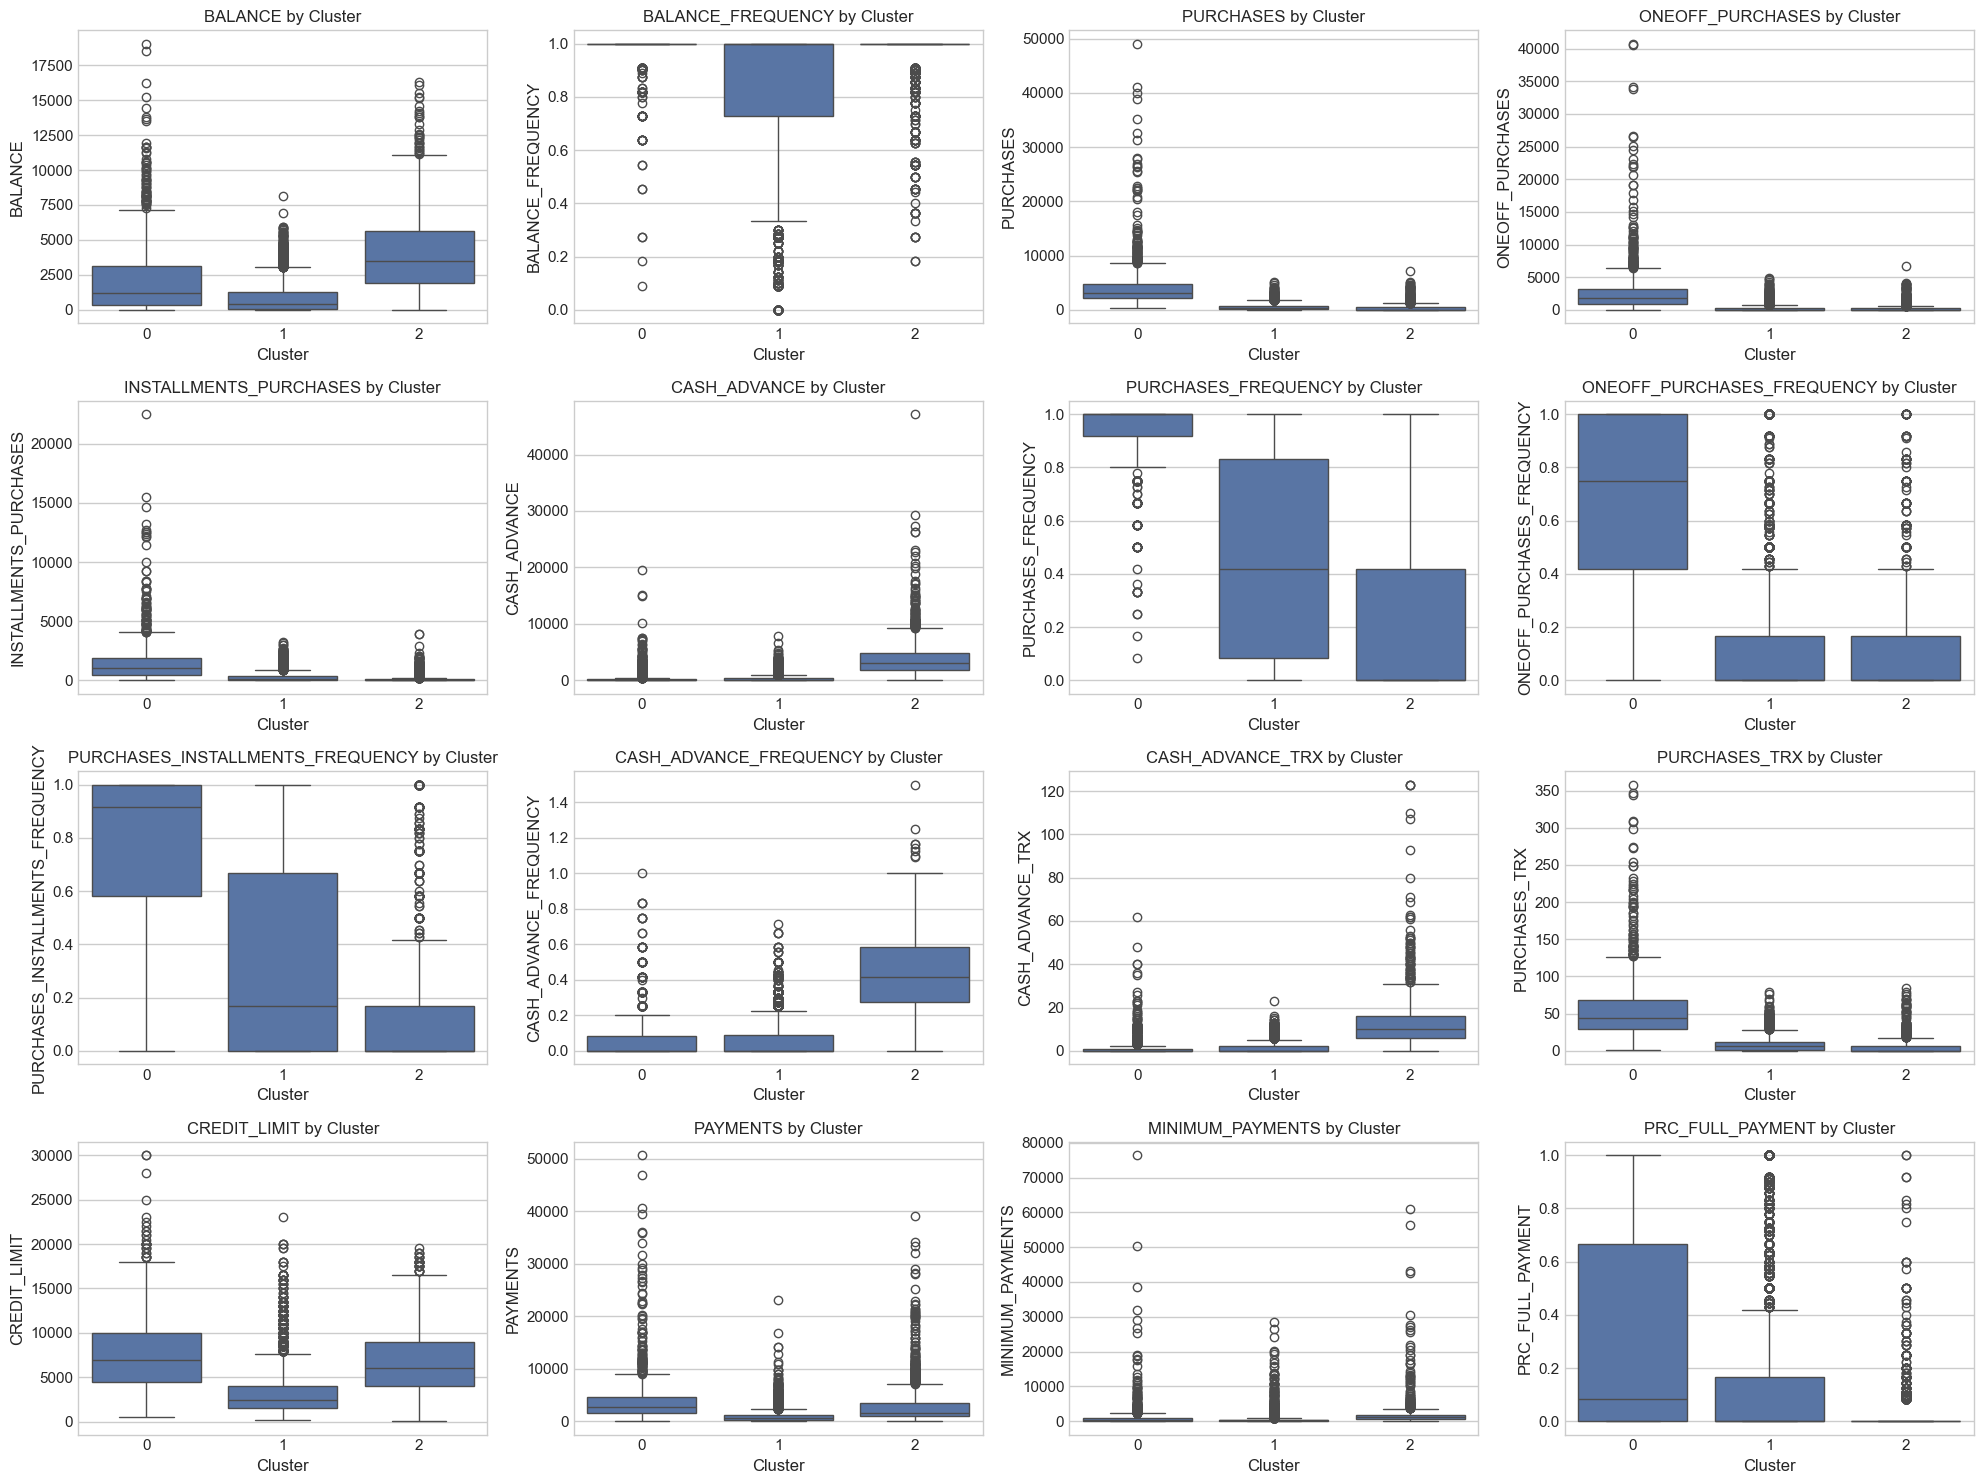

In [8]:
# Menggunakan PCA untuk visualisasi hasil clustering
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled.drop('Cluster', axis=1))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = df_scaled['Cluster']

# Visualisasi cluster dengan PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='viridis', s=50, alpha=0.8)
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Visualisasi cluster dengan PCA (fitur terpilih)
pca_selected = PCA(n_components=2)
principal_components_selected = pca_selected.fit_transform(X_selected.drop('Cluster', axis=1))
principal_df_selected = pd.DataFrame(data=principal_components_selected, columns=['PC1', 'PC2'])
principal_df_selected['Cluster'] = X_selected['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df_selected, palette='viridis', s=50, alpha=0.8)
plt.title('Visualisasi Cluster dengan PCA (Fitur Terpilih)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Visualisasi karakteristik cluster untuk beberapa fitur penting
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_original.columns[:-2]):  # Exclude 'Cluster' and 'Cluster_Selected'
    if i < 16:  # Limit to 16 subplots
        plt.subplot(4, 4, i+1)
        sns.boxplot(x='Cluster', y=column, data=df_original)
        plt.title(f'{column} by Cluster')
        plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

Statistik untuk setiap cluster:


BALANCE                          BALANCE_FREQUENCY            \
                mean        min           max              mean       min   
Cluster                                                                     
0        2182.352833  12.423203  19043.138560          0.981702  0.090909   
1         807.722510   0.000000   8115.039014          0.834577  0.000000   
2        4023.788865   4.382924  16304.889250          0.959193  0.181818   

                PURCHASES                  ONEOFF_PURCHASES  ...     PAYMENTS  \
         max         mean    min       max             mean  ...          max   
Cluster                                                      ...                
0        1.0  4187.017796  236.4  49039.57      2663.995153  ...  50721.48336   
1        1.0   496.062522    0.0   5080.85       247.273214  ...  23150.57184   
2        1.0   389.051448    0.0   7194.53       252.333261  ...  39048.59762   

        MINIMUM_PAYMENTS                         PRC_FULL_PAYMENT            \
                    mean        min          max             mean  min  max   
Cluster                                                                       
0            1227.915879  14.012997  76406.20752         0.298766  0.0  1.0   
1             530.068546   0.019163  28483.25483         0.154115  0.0  1.0   
2            1765.204181  16.950090  61031.61860         0.033673  0.0  1.0   

            TENURE          
              mean min max  
Cluster                     
0        11.916863   6  12  
1        11.475793   6  12  
2        11.353619   6  12  

[3 rows x 51 columns]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Selected
Cluster,,,,,,,,,,,,,,,,,,
0,2182.352833,0.981702,4187.017796,2663.995153,1523.493231,449.753140,0.948175,0.664780,0.739630,0.062415,1.507451,55.692549,7642.784314,4075.533648,1227.915879,0.298766,11.916863,0.228235
1,807.722510,0.834577,496.062522,247.273214,249.110368,338.996760,0.460353,0.129191,0.342052,0.069563,1.236833,8.480046,3267.022176,907.446164,530.068546,0.154115,11.475793,0.943409
2,4023.788865,0.959193,389.051448,252.333261,136.797412,3917.254973,0.233899,0.111806,0.145661,0.451410,12.551570,5.636131,6729.471201,3053.943771,1765.204181,0.033673,11.353619,1.774504


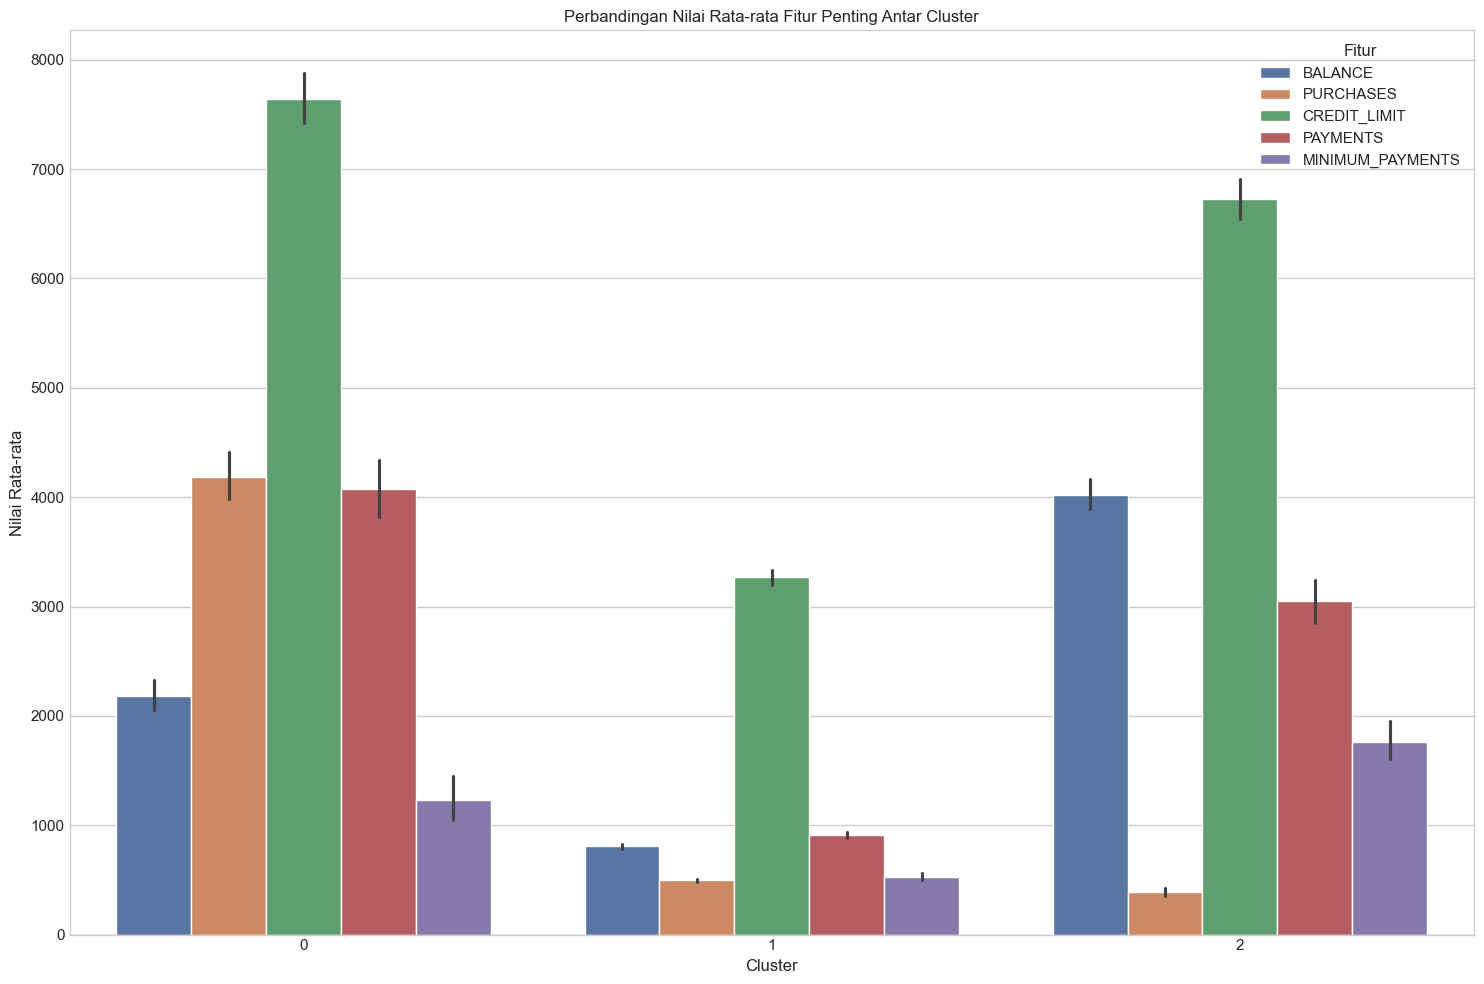

In [9]:
# Mendapatkan statistik untuk setiap cluster
cluster_stats = df_original.groupby('Cluster').agg({
    'BALANCE': ['mean', 'min', 'max'],
    'BALANCE_FREQUENCY': ['mean', 'min', 'max'],
    'PURCHASES': ['mean', 'min', 'max'],
    'ONEOFF_PURCHASES': ['mean', 'min', 'max'],
    'INSTALLMENTS_PURCHASES': ['mean', 'min', 'max'],
    'CASH_ADVANCE': ['mean', 'min', 'max'],
    'PURCHASES_FREQUENCY': ['mean', 'min', 'max'],
    'ONEOFF_PURCHASES_FREQUENCY': ['mean', 'min', 'max'],
    'PURCHASES_INSTALLMENTS_FREQUENCY': ['mean', 'min', 'max'],
    'CASH_ADVANCE_FREQUENCY': ['mean', 'min', 'max'],
    'CASH_ADVANCE_TRX': ['mean', 'min', 'max'],
    'PURCHASES_TRX': ['mean', 'min', 'max'],
    'CREDIT_LIMIT': ['mean', 'min', 'max'],
    'PAYMENTS': ['mean', 'min', 'max'],
    'MINIMUM_PAYMENTS': ['mean', 'min', 'max'],
    'PRC_FULL_PAYMENT': ['mean', 'min', 'max'],
    'TENURE': ['mean', 'min', 'max']
})

# Menampilkan statistik
print("Statistik untuk setiap cluster:")
display(cluster_stats)

# Analisis perbandingan nilai rata-rata fitur antar cluster
cluster_means = df_original.groupby('Cluster').mean()
display(cluster_means)

# Visualisasi perbandingan nilai rata-rata beberapa fitur penting antar cluster
fitur_penting = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
melted_df = pd.melt(df_original.reset_index(), id_vars=['index', 'Cluster'], value_vars=fitur_penting)

plt.figure(figsize=(15, 10))
sns.barplot(x='Cluster', y='value', hue='variable', data=melted_df)
plt.title('Perbandingan Nilai Rata-rata Fitur Penting Antar Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.legend(title='Fitur')
plt.tight_layout()
plt.show()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [10]:
# Mengambil centroid model dan mengembalikan ke skala asli
centroids = final_model.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

# Membuat DataFrame centroid dengan nama kolom
centroids_df = pd.DataFrame(centroids_original, columns=df_preprocessed.columns)
centroids_df.index.name = 'Cluster'
centroids_df.reset_index(inplace=True)

print("Centroid dalam skala asli:")
display(centroids_df)

Centroid dalam skala asli:


,Cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,2181.001444,0.981588,4183.413814,2661.487800,1522.395865,449.190760,0.948256,0.664457,0.739777,0.062448,1.506656,55.656226,7635.747847,4072.791364,1226.900609,0.298298,11.916993
1,1,807.607090,0.834580,495.526666,246.965865,248.881914,339.105008,0.460101,0.129062,0.341836,0.069629,1.238017,8.470800,3266.722327,906.932097,530.067852,0.154140,11.475708
2,2,4025.646615,0.959167,389.300840,252.495013,136.885103,3919.442913,0.234049,0.111877,0.145755,0.451379,12.554487,5.639744,6733.015734,3055.517303,1765.935065,0.033694,11.353205


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [11]:
# Analisis karakteristik tiap cluster
karakteristik_cluster = {}

for cluster in range(optimal_k):
    cluster_data = df_original[df_original['Cluster'] == cluster]
    karakteristik_cluster[cluster] = {
        'count': len(cluster_data),
        'percentage': f"{(len(cluster_data) / len(df_original) * 100):.2f}%",
        'balance_mean': cluster_data['BALANCE'].mean(),
        'balance_min': cluster_data['BALANCE'].min(),
        'balance_max': cluster_data['BALANCE'].max(),
        'purchases_mean': cluster_data['PURCHASES'].mean(),
        'purchases_min': cluster_data['PURCHASES'].min(),
        'purchases_max': cluster_data['PURCHASES'].max(),
        'credit_limit_mean': cluster_data['CREDIT_LIMIT'].mean(),
        'credit_limit_min': cluster_data['CREDIT_LIMIT'].min(),
        'credit_limit_max': cluster_data['CREDIT_LIMIT'].max(),
        'payments_mean': cluster_data['PAYMENTS'].mean(),
        'payments_min': cluster_data['PAYMENTS'].min(),
        'payments_max': cluster_data['PAYMENTS'].max(),
        'prc_full_payment_mean': cluster_data['PRC_FULL_PAYMENT'].mean(),
        'prc_full_payment_min': cluster_data['PRC_FULL_PAYMENT'].min(),
        'prc_full_payment_max': cluster_data['PRC_FULL_PAYMENT'].max()
    }

# Menampilkan karakteristik tiap cluster
for cluster, stats in karakteristik_cluster.items():
    print(f"Cluster {cluster}:")
    print(f"  Jumlah data: {stats['count']} ({stats['percentage']})")
    print(f"  BALANCE: mean={stats['balance_mean']:.2f}, min={stats['balance_min']:.2f}, max={stats['balance_max']:.2f}")
    print(f"  PURCHASES: mean={stats['purchases_mean']:.2f}, min={stats['purchases_min']:.2f}, max={stats['purchases_max']:.2f}")
    print(f"  CREDIT_LIMIT: mean={stats['credit_limit_mean']:.2f}, min={stats['credit_limit_min']:.2f}, max={stats['credit_limit_max']:.2f}")
    print(f"  PAYMENTS: mean={stats['payments_mean']:.2f}, min={stats['payments_min']:.2f}, max={stats['payments_max']:.2f}")
    print(f"  PRC_FULL_PAYMENT: mean={stats['prc_full_payment_mean']:.2f}, min={stats['prc_full_payment_min']:.2f}, max={stats['prc_full_payment_max']:.2f}")
    print()

Cluster 0:
  Jumlah data: 1275 (14.25%)
  BALANCE: mean=2182.35, min=12.42, max=19043.14
  PURCHASES: mean=4187.02, min=236.40, max=49039.57
  CREDIT_LIMIT: mean=7642.78, min=500.00, max=30000.00
  PAYMENTS: mean=4075.53, min=0.00, max=50721.48
  PRC_FULL_PAYMENT: mean=0.30, min=0.00, max=1.00

Cluster 1:
  Jumlah data: 6114 (68.31%)
  BALANCE: mean=807.72, min=0.00, max=8115.04
  PURCHASES: mean=496.06, min=0.00, max=5080.85
  CREDIT_LIMIT: mean=3267.02, min=150.00, max=23000.00
  PAYMENTS: mean=907.45, min=0.00, max=23150.57
  PRC_FULL_PAYMENT: mean=0.15, min=0.00, max=1.00

Cluster 2:
  Jumlah data: 1561 (17.44%)
  BALANCE: mean=4023.79, min=4.38, max=16304.89
  PURCHASES: mean=389.05, min=0.00, max=7194.53
  CREDIT_LIMIT: mean=6729.47, min=50.00, max=19600.00
  PAYMENTS: mean=3053.94, min=0.00, max=39048.60
  PRC_FULL_PAYMENT: mean=0.03, min=0.00, max=1.00



Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [12]:
# Menggabungkan data asli dengan hasil clustering
df_export = df.copy()
df_export['Cluster'] = df_original['Cluster']

# Menyimpan hasil ke file CSV
df_export.to_csv('dataset/CC_GENERAL_with_clusters.csv', index=False)
print("Data berhasil disimpan ke 'dataset/CC_GENERAL_with_clusters.csv'")

Data berhasil disimpan ke 'dataset/CC_GENERAL_with_clusters.csv'
